In [ ]:
# rtmdet-tiny, coco, plantdoc, epoch 300, axial Block注意力机制, eucb上采样
!python tools/train.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb.py
!featurize instance release $UUID

07/17 07:39:02 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 391385118
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,co

In [1]:
# test
!python tools/test.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb.py \
work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/best_coco_bbox_mAP_epoch_300.pth

07/17 15:45:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 1253452622
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,c

plot curve of work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/20250717_073826/vis_data/20250717_073826.json, metric is loss
xs:

50
100
197
247
344
394
491
541
638
688
785
835
932
982
1079
1129
1226
1276
1373
1423
1520
1570
1667
1717
1814
1864
1961
2011
2108
2158
2255
2305
2402
2452
2549
2599
2696
2746
2843
2893
2990
3040
3137
3187
3284
3334
3431
3481
3578
3628
3725
3775
3872
3922
4019
4069
4166
4216
4313
4363
4460
4510
4607
4657
4754
4804
4901
4951
5048
5098
5195
5245
5342
5392
5489
5539
5636
5686
5783
5833
5930
5980
6077
6127
6224
6274
6371
6421
6518
6568
6665
6715
6812
6862
6959
7009
7106
7156
7253
7303
7400
7450
7547
7597
7694
7744
7841
7891
7988
8038
8135
8185
8282
8332
8429
8479
8576
8626
8723
8773
8870
8920
9017
9067
9164
9214
9311
9361
9458
9508
9605
9655
9752
9802
9899
9949
10046
10096
10193
10243
10340
10390
10487
10537
10634
10684
10781
10831
10928
10978
11075
11125
11222
11272
11369
11419
11516
11566
11663
11713
11810
11860
11957
12007
12104
12154
12251
12301

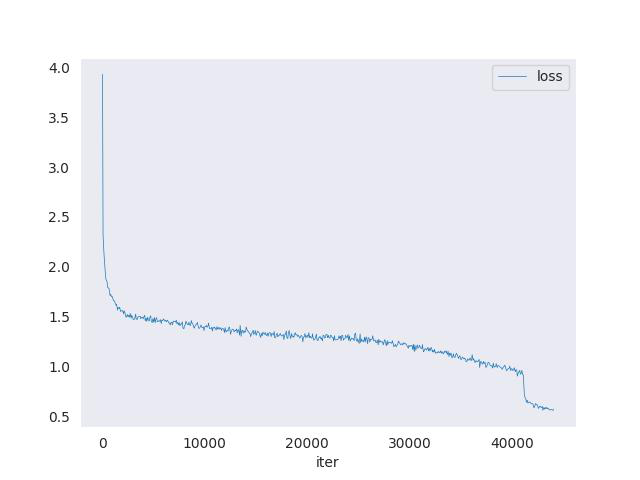

In [6]:
# figure, loss
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/20250717_073826/vis_data/20250717_073826.json --keys loss --out work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/rtmdet_tiny_axialBlock_eucb_loss.jpg --legend loss
# -out mAP.pdf --legend mAP
from PIL import Image
img=Image.open('work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/rtmdet_tiny_axialBlock_eucb_loss.jpg')
img.show()

In [3]:
# 计算参数量和FLOPS
!python tools/analysis_tools/get_flops.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb.py

07/17 15:48:35 - mmengine - WARNING - Some config files, such as configs/yolact and configs/detectors,may have compatibility issues with torch.jit when torch<1.12. If you want to calculate flops for these models, please make sure your pytorch version is >=1.12.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/home/featurize/work/mmdetection/mmdet/models/plugins/EUCB.py:11: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  channels_per_group = num_channels // groups
07/17 15:48:57 - mmengine - WARNING - Unsupported operator aten::silu_ encountered 45 time(s)
07/17 15:48:57 - mmengine - WARNING - Unsupported operator aten::add enco

In [1]:
# 计算FPS
!python -m torch.distributed.launch --nproc_per_node=1 --master_port=29500  \
        tools/analysis_tools/benchmark.py \
        configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb.py \
        --checkpoint work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/best_coco_bbox_mAP_epoch_300.pth \
        --launcher pytorch --max-iter 237 --log-interval 237 --repeat-num 10

/environment/miniconda3/lib/python3.7/site-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:27: UserWarning: Multi-processing start method `fork` is different from the previous setting `spawn`.It will be force set to `fork`. You can change this behavior by changing `mp_start_method` in your config.
  f'Multi-processing start method `{mp_start_method}` is '
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:47: UserWarning: Setting OMP_NUM_THREADS environment variable fo

In [1]:
# test
!python tools/test.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb.py \
work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-axialBlock-eucb/best_coco_bbox_mAP_epoch_300.pth \
--show-dir rtmdet_tiny_axial_eucb

07/19 16:41:27 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 898660947
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code